In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
dataframe = pd.read_csv('./housing.csv')

In [4]:
dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
dataframe.shape

(20640, 10)

In [6]:
X = dataframe.drop(['median_house_value'], axis = 1)
Y = dataframe['median_house_value']

In [7]:
X.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,NEAR BAY


In [8]:
Y.head(10)

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
5    269700.0
6    299200.0
7    241400.0
8    226700.0
9    261100.0
Name: median_house_value, dtype: float64

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
dataframe['total_bedrooms'].isnull().sum()

207

In [11]:
dataframe = dataframe.dropna()

In [12]:
dataframe['total_bedrooms'].isnull().sum()

0

In [13]:
dataframe['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124782668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x124ee6128>]], dtype=object)

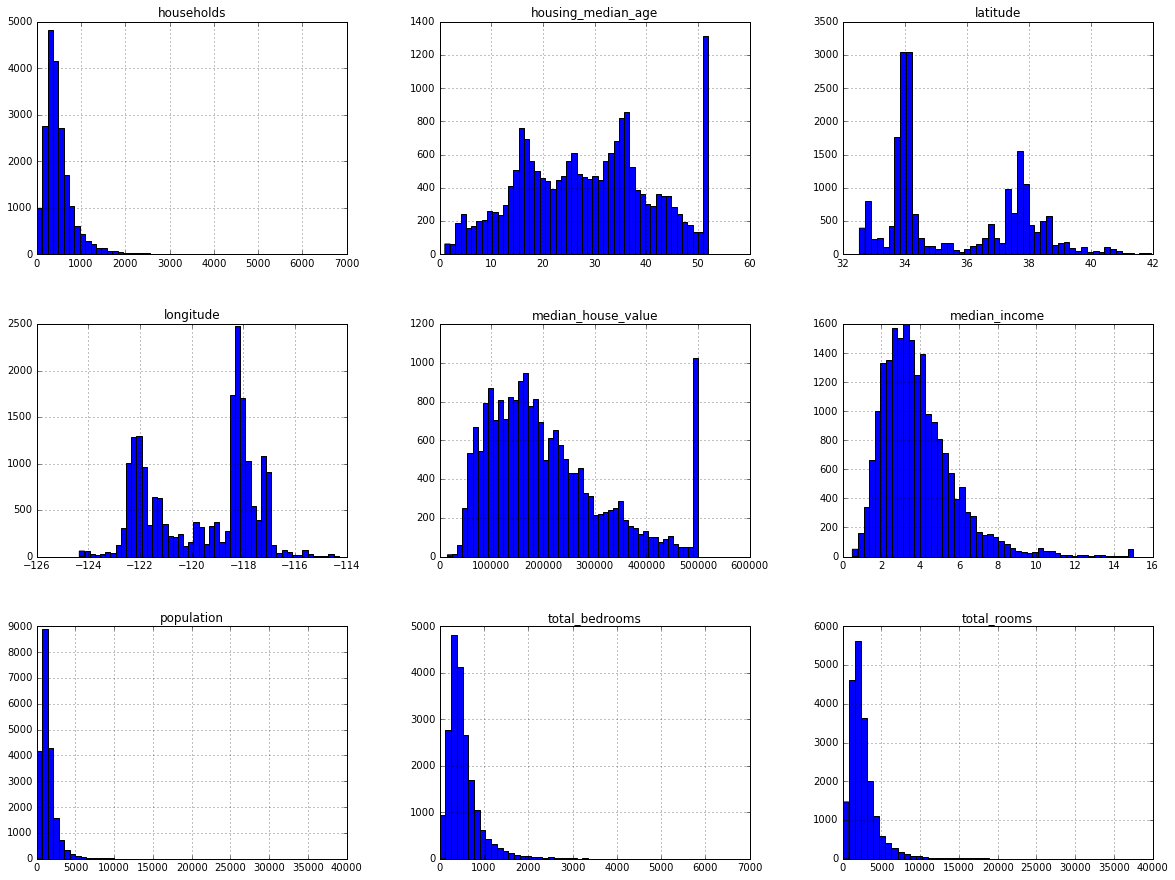

In [15]:
dataframe.hist(bins = 50, figsize = (20, 15))

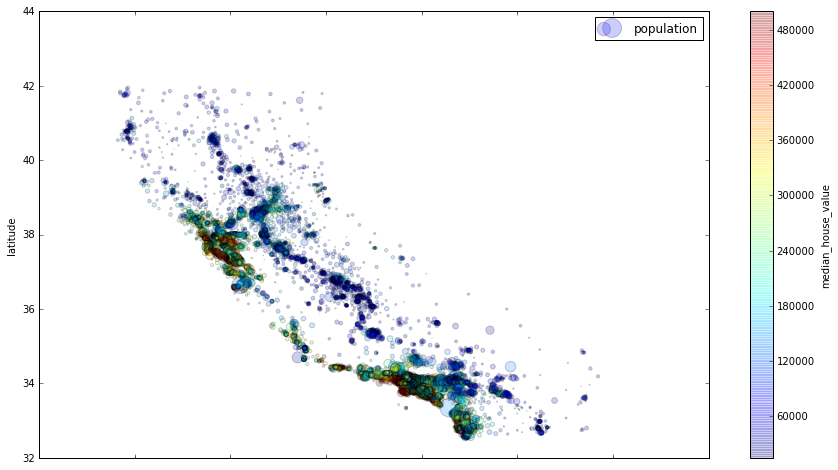

In [16]:
dataframe.plot(
    kind = 'scatter', 
    x = 'longitude', 
    y = 'latitude', 
    alpha = 0.2, 
    s = dataframe['population'] / 100, 
    c = 'median_house_value', 
    label = 'population', 
    cmap = plt.get_cmap('jet'), 
    figsize = (15, 8),
    colorbar = True)

plt.legend()

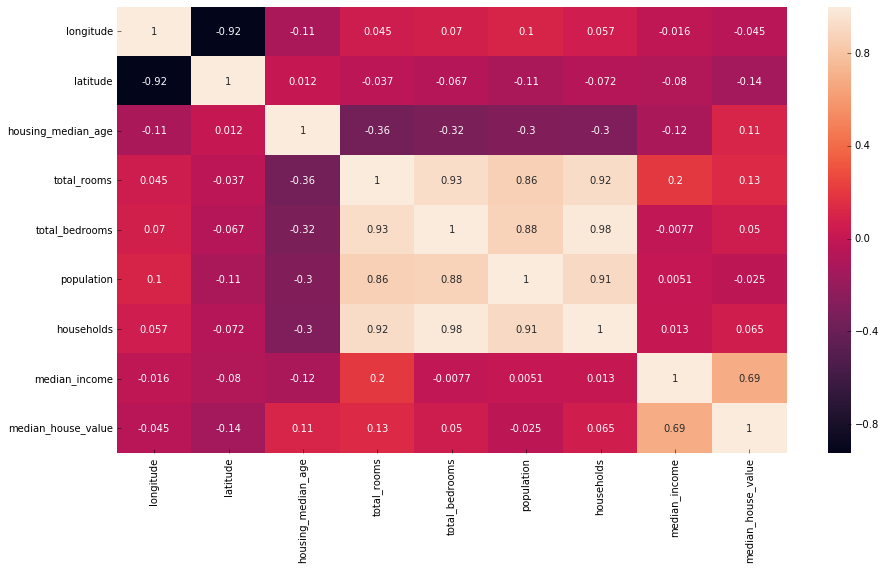

In [17]:
correlation_matrix = dataframe.corr()
plt.figure(figsize = (15, 8))
sns.heatmap(correlation_matrix, annot = True)

In [18]:
correlation_matrix["median_house_value"].sort_values(ascending = True)

latitude             -0.144638
longitude            -0.045398
population           -0.025300
total_bedrooms        0.049686
households            0.064894
housing_median_age    0.106432
total_rooms           0.133294
median_income         0.688355
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [19]:
dataframe['rooms_per_household'] = dataframe['total_rooms'] / dataframe['households']
dataframe['bedrooms_per_room'] = dataframe['total_bedrooms'] / dataframe['total_rooms']
dataframe['population_per_household'] = dataframe['population'] / dataframe['households']

In [20]:
correlation_matrix = dataframe.corr()

In [21]:
correlation_matrix["median_house_value"].sort_values(ascending = True)

bedrooms_per_room          -0.255880
latitude                   -0.144638
longitude                  -0.045398
population                 -0.025300
population_per_household   -0.023639
total_bedrooms              0.049686
households                  0.064894
housing_median_age          0.106432
total_rooms                 0.133294
rooms_per_household         0.151344
median_income               0.688355
median_house_value          1.000000
Name: median_house_value, dtype: float64

In [22]:
dataframe = dataframe.join(pd.get_dummies(dataframe['ocean_proximity'])).drop(['ocean_proximity'], axis = 1)

In [23]:
dataframe.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,4.761658,0.231774,2.139896,0.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,4.931907,0.192899,2.128405,0.0,0.0,0.0,1.0,0.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,4.797527,0.221327,1.788253,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,4.294118,0.260274,2.026891,0.0,0.0,0.0,1.0,0.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,4.970588,0.199211,2.172269,0.0,0.0,0.0,1.0,0.0


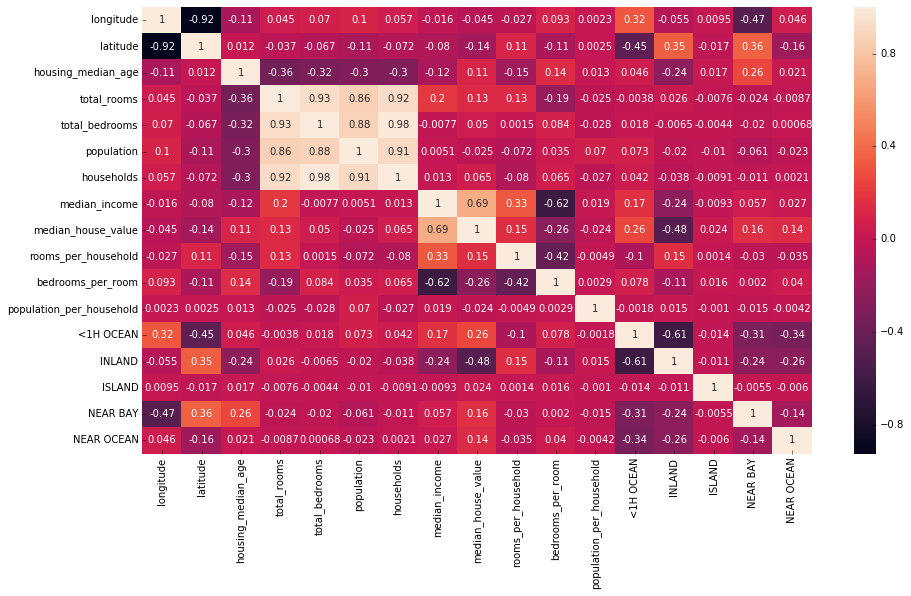

In [24]:
plt.figure(figsize = (15, 8))
sns.heatmap(dataframe.corr(), annot = True)

In [25]:
features = dataframe.drop(['median_house_value'], axis = 1)
target = dataframe['median_house_value']

In [26]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

In [28]:
linear_regressor_model = LinearRegression()
linear_regressor_model.fit(X_train, y_train)
linear_regressor_model.score(X_test, y_test)

0.62669771643137406

In [29]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_test, y_test)

0.63576877065705006

In [30]:
random_forest_regressor_model = RandomForestRegressor()
random_forest_regressor_model.fit(X_train, y_train)
random_forest_regressor_model.score(X_test, y_test)

0.7878883196438069

In [ ]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_model.score(X_test, y_test)

-0.0599494985382798

In [ ]:
logistic_regressor_model = LogisticRegression()
logistic_regressor_model.fit(X_train, y_train)
logistic_regressor_model.score(X_test, y_test)